In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import h5py
from sklearn.metrics import accuracy_score

In [2]:
data_train = h5py.File(r"C:\Users\Haris\Desktop\Python Files\Cat image data\train_catvnoncat.h5",'r')
data_test  = h5py.File(r"C:\Users\Haris\Desktop\Python Files\Cat image data\test_catvnoncat.h5",'r')

In [3]:
data_train.keys()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

In [4]:
data_test.keys()

<KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>

In [5]:
train_x , train_y = np.array(data_train['train_set_x']) , np.array(data_train['train_set_y'])
test_x , test_y   = np.array(data_test['test_set_x']) , np.array(data_test['test_set_y'])

In [6]:
print('Train set dimensions:')
print('train_x:',train_x.shape, 'train_y:',train_y.shape)
print('Data Examples:',train_x.shape[0],'Features:',train_x.shape[1]*train_x.shape[2]*train_x.shape[3])
print('Test set dimensions:')
print('test_x:',test_x.shape, 'test_y:',test_y.shape)

Train set dimensions:
train_x: (209, 64, 64, 3) train_y: (209,)
Data Examples: 209 Features: 12288
Test set dimensions:
test_x: (50, 64, 64, 3) test_y: (50,)


<h3>1 - DataSet Processing</h3>

Y: 1 It is a cat


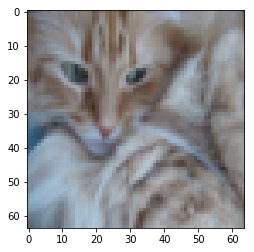

In [7]:
#displaying image
classes = ['not a cat','cat']
index = np.random.randint(209)
plt.imshow( train_x[index] )
print('Y:',train_y[index],'It is a',classes[train_y[index]])

In [8]:
#data arrangement in form of arrays
train_x_array = train_x.reshape(train_x.shape[0], -1).T
train_y_array = train_y.reshape(train_y.shape[0], -1).T
test_x_array = test_x.reshape(test_x.shape[0], -1).T
test_y_array = test_y.reshape(test_y.shape[0], -1).T

print('New dimension of train_x:',train_x_array.shape)

print('New dimension of train_y:',train_y_array.shape)

print('New dimension of test_x:',test_x_array.shape)

print('New dimension of test_x:',test_y_array.shape)

New dimension of train_x: (12288, 209)
New dimension of train_y: (1, 209)
New dimension of test_x: (12288, 50)
New dimension of test_x: (1, 50)


In [9]:
#for image it's better to normalize it. It provides better results.
train_set_x = train_x_array / 255

test_set_x = test_x_array / 255

<h3>2 - Neural Network Architecture </h3>

<p>The neural network will have following structure</p>
<li>Two hidden layers
<li>5 nodes per layer
<li>sigmoid activation function

<h3>3 - Making helper modules</h3>

<p>Following will be the steps:</p>
<li>initialize weights
<li>sigmoid function (for outer layer)
<li>tanh function (activation for inner layer)
<li>Forward Propagation
<li>Compute the cost
<li>Backward Propagation

In [40]:
#h1 h2 are hidden layers 1 and 2
def initialize_parameters(x,h1,h2,y):
    
    W1 = np.random.randn(h1,x) * 0.01
    b1 = np.zeros((h1,1))
    W2 = np.random.randn(h2,h1) * 0.01
    b2 = np.zeros((h2,1))
    W3 = np.random.randn(y,h2) * 0.01
    b3 = np.zeros((y,1))
    
    parameters = {'W1': W1,
                  'b1': b1,
                  'W2': W2,
                  'b2': b2,
                  'W3': W3,
                  'b3': b3
                  }
    return parameters

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$


In [41]:
def tanh (Z):
    return np.tanh (Z)

In [42]:
def tanh_d(Z):
    return 1 - np.power(np.tanh(Z),2)

In [43]:
def sigmoid(Z):
    
    sig = 1/(1 + np.exp(-Z))
    
    return sig

In [44]:
#Test point
assert(sigmoid(-1) == (1/ (1 + np.exp(1)))) #error running this tab indicates fault

In [45]:
def sigmoid_d(Z):
    
    sig_d = sigmoid(Z) * (1 - sigmoid (Z))
    
    return sig_d

In [46]:
def forward_prop(X, parameters):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    # layer 1 (#Z1 is the linear operation of layer 1 and A1 is activation of layer 1)
    
    Z1 = W1 @ X + b1    
    
    A1 = tanh (Z1)  
    
    #layer 2
    Z2 = W2 @ A1 + b2
    
    A2 = tanh (Z2)
    
    #layer3(output layer)
    Z3 = W3 @ A2 + b3
    
    A3 = sigmoid (Z3)
    
    
    cache = {'Z1':Z1,
             'A1':A1,
             'Z2':Z2,
             'A2':A2,  
             'Z3':Z3,
             'A3':A3 }
    
    return cache

In [47]:
def cost_computation(A3, Y):
    
    m = Y.shape[1]
    
    J = - ( (Y) @ np.log(A3).T + (1-Y) @ np.log(1 - A3).T )
    
    J = J / m
    
    
    return np.squeeze(J)    

In [48]:
def back_prop(cache, X, Y, parameters):
    
    #layer 3(output layer)
    
    m = Y.shape[1]

    dZ3 = cache['A3'] - Y
    dW3 = ( dZ3 @ cache['A2'].T ) / m
    db3 = np.sum(dZ3, axis=1, keepdims=True) / m
    
    #layer 2 (hidden layer 2)
    
    dZ2 = (parameters['W3'].T @ dZ3 ) * tanh_d (cache['Z2'])
    dW2 = ( dZ2 @ cache['A1'].T ) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    
    #layer 1 (hidden layer 1)
    
    dZ1 = (parameters['W2'].T @ dZ2) * tanh_d (cache['Z1'])
    dW1 = ( dZ1 @ X.T ) / m 
    db1 = np.sum(dZ1, axis= 1, keepdims=True) / m
    
    grads={'dW3':dW3,
           'db3':db3, 
           'dW2':dW2,
           'db2':db2,
           'dW1':dW1,
           'db1':db1,}
    
    return grads

In [65]:
def optimize(grads, parameters, learning_rate):
    
    
    parameters['W1'] = parameters['W1'] - (learning_rate * grads['dW1'])
    
    parameters['b1'] = parameters['b1'] - (learning_rate * grads['db1'])
        
    parameters['W2'] = parameters['W2'] - (learning_rate * grads['dW2'])
            
    parameters['b2'] = parameters['b2'] - (learning_rate * grads['db2'])
    
    parameters['W3'] = parameters['W3'] - (learning_rate * grads['dW3'])
        
    parameters['b3'] = parameters['b3'] - (learning_rate * grads['db3'])
    
    
    return parameters

In [66]:
def predict(parameters, X):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1 = W1 @ X + b1    
    
    A1 = tanh (Z1)  
    
    #layer 2
    Z2 = W2 @ A1 + b2
    
    A2 = tanh (Z2)
    
    #layer3(output layer)
    Z3 = W3 @ A2 + b3
    
    A3 = sigmoid (Z3)
    
    return A3

<h3>Training the model</h3>
<h4>Modules:</h4>

<li> def initialize_parameters (x,h1,h2,y):
<li> def forward_prop (X, parameters) :
<li> def cost_computation (A3, Y) :
<li> def back_prop (cache, X, Y, parameters) :
<li> def optimize (grads, parameters, learning_rate) :
<li> def predict (parameters, X) :    

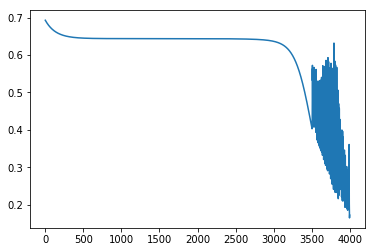

In [85]:
nx = train_set_x.shape[0]

parameters = initialize_parameters(nx,10,10,1)

cost = list()

n = 4000

iterations = np.arange(n)

for i in range(n):
        
    cache = forward_prop(train_set_x, parameters)
    
    cost.append(cost_computation(cache['A3'], train_y_array))
    
    grads = back_prop(cache, train_set_x, train_y_array, parameters)
    
    parameters = optimize (grads, parameters, 0.015)


plt.plot(iterations, cost)

plt.show()    

The above step required some hyperparameter tuning. The model worked better on:
<li> nh1 = nh2 = 10
<li> Iterations = 5000

<h3>Prediction </h3>
<p>We predict and find accuracy on train data</p>

In [110]:
out = predict(parameters, train_set_x)
prediction = np.where(out > 0.5, 1, 0)
accuracy = round(accuracy_score(train_y_array.T, prediction.T) * 100, 2)

In [111]:
print('The program provide',accuracy,'accuracy on train data')

The program provide 91.87 accuracy on train data


<p>Now we use our test data and find out the accuracy on that</p>

In [121]:
test_out = predict(parameters, test_set_x)
test_prediction = np.where(test_out > 0.5, 1, 0).T
accuracy = round(accuracy_score(test_y_array.T, test_prediction) * 100, 2)

In [122]:
print('On set test the model has accuracy:',accuracy)

On set test the model has accuracy: 80.0


<h3>Visualizing Results</h3>

Y: 1 It is cat 

Model says it is cat


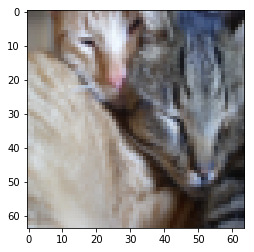

In [144]:
index = np.random.randint(50)

plt.imshow( test_x[index] )

print('Y:',test_y[index],'It is',classes[test_y[index]],'\n')

print('Model says it is', classes[np.squeeze(test_prediction[index])])